In [1]:
import pandas as ps
import numpy as pn
import warnings
warnings.filterwarnings('ignore')

In [2]:
fd=ps.read_csv("C:/Users/Harshit/Downloads/AirPassengers.csv")

In [3]:
fd.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [4]:
fd["Month"].dtype

dtype('O')

In [5]:
fd.shape

(144, 2)

In [6]:
fd1 = ps.read_csv("C:/Users/Harshit/Downloads/AirPassengers.csv", header=0 , parse_dates=[0])
fd1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [7]:
fd1["Month"].dtype

dtype('<M8[ns]')

In [8]:
fd1.shape

(144, 2)

### Loading Data as a series


In [9]:
series = ps.read_csv("C:/Users/Harshit/Downloads/AirPassengers.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)

In [10]:
series.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
series.shape

(144,)

### Querying by time

In [12]:
series["1950"]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [13]:
fd1[(fd1["Month"] > '1959-01-01') & (fd1["Month"] <= '1960-01-21')]

,Month,#Passengers
121,1959-02-01,342
122,1959-03-01,406
123,1959-04-01,396
124,1959-05-01,420
125,1959-06-01,472
126,1959-07-01,548
127,1959-08-01,559
128,1959-09-01,463
129,1959-10-01,407
130,1959-11-01,362


### Descriptive Statistics


In [14]:
series.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: #Passengers, dtype: float64

In [15]:
fd1.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature

### Date time features

In [16]:
fd1.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [17]:
features = fd1.copy()

In [18]:
features['year'] = fd1["Month"].dt.year

In [19]:
features["month"] = fd1["Month"].dt.year

In [20]:
features["day"] = fd1["Month"].dt.year

In [21]:
features.head()

,Month,#Passengers,year,month,day
0,1949-01-01,112,1949,1949,1949
1,1949-02-01,118,1949,1949,1949
2,1949-03-01,132,1949,1949,1949
3,1949-04-01,129,1949,1949,1949
4,1949-05-01,121,1949,1949,1949


### Lag features


To create lag features

In [22]:
features['lag2'] =  fd1["#Passengers"].shift(2)

In [23]:
features['lag2'] =  fd1["#Passengers"].shift(365)

In [24]:
features.head()

,Month,#Passengers,year,month,day,lag2
0,1949-01-01,112,1949,1949,1949,NaN
1,1949-02-01,118,1949,1949,1949,NaN
2,1949-03-01,132,1949,1949,1949,NaN
3,1949-04-01,129,1949,1949,1949,NaN
4,1949-05-01,121,1949,1949,1949,NaN


### Window Feature

In [25]:
features['Roll_mean'] = fd1["#Passengers"].rolling(window = 2).mean()

In [26]:
features.head()

,Month,#Passengers,year,month,day,lag2,Roll_mean
0,1949-01-01,112,1949,1949,1949,NaN,NaN
1,1949-02-01,118,1949,1949,1949,NaN,115.0
2,1949-03-01,132,1949,1949,1949,NaN,125.0
3,1949-04-01,129,1949,1949,1949,NaN,130.5
4,1949-05-01,121,1949,1949,1949,NaN,125.0


In [27]:
features['Roll_max'] = fd1["#Passengers"].rolling(window = 3).max()

In [28]:
features.head()

,Month,#Passengers,year,month,day,lag2,Roll_mean,Roll_max
0,1949-01-01,112,1949,1949,1949,NaN,NaN,NaN
1,1949-02-01,118,1949,1949,1949,NaN,115.0,NaN
2,1949-03-01,132,1949,1949,1949,NaN,125.0,132.0
3,1949-04-01,129,1949,1949,1949,NaN,130.5,132.0
4,1949-05-01,121,1949,1949,1949,NaN,125.0,132.0


### Expanding features

In [29]:
features['Expand_max'] = fd1["#Passengers"].expanding().max()

In [30]:
features.head()

,Month,#Passengers,year,month,day,lag2,Roll_mean,Roll_max,Expand_max
0,1949-01-01,112,1949,1949,1949,NaN,NaN,NaN,112.0
1,1949-02-01,118,1949,1949,1949,NaN,115.0,NaN,118.0
2,1949-03-01,132,1949,1949,1949,NaN,125.0,132.0,132.0
3,1949-04-01,129,1949,1949,1949,NaN,130.5,132.0,132.0
4,1949-05-01,121,1949,1949,1949,NaN,125.0,132.0,132.0


# Time Series - Data Visualization


In [31]:
from matplotlib import pyplot as mt
%matplotlib inline

In [32]:
Dataviz_df = fd1.copy()

In [33]:
Dataviz_df.head(10)

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


<AxesSubplot:>

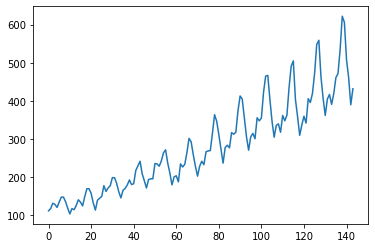

In [34]:
Dataviz_df["#Passengers"].plot()

In [35]:
Dataviz_df.index = Dataviz_df["Month"] 

<AxesSubplot:xlabel='Month'>

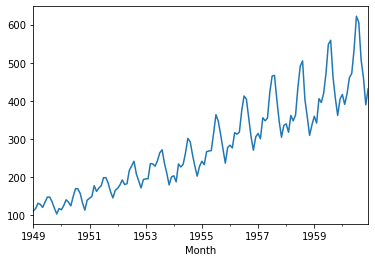

In [36]:
Dataviz_df["#Passengers"].plot()

### Zooming In

In [37]:
Dataviz_fd1 = Dataviz_df[(Dataviz_df["Month"] > '1959-01-01') & (Dataviz_df["Month"] <= '1960-01-10')].copy()

In [38]:
Dataviz_fd1

,Month,#Passengers
Month,,
1959-02-01,1959-02-01,342
1959-03-01,1959-03-01,406
1959-04-01,1959-04-01,396
1959-05-01,1959-05-01,420
1959-06-01,1959-06-01,472
1959-07-01,1959-07-01,548
1959-08-01,1959-08-01,559
1959-09-01,1959-09-01,463
1959-10-01,1959-10-01,407


<AxesSubplot:xlabel='Month'>

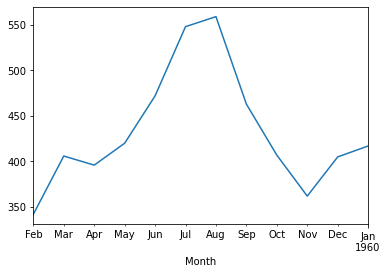

In [39]:
Dataviz_fd1["#Passengers"].plot()

### Trendline

In [40]:
import seaborn as sns

<AxesSubplot:ylabel='#Passengers'>

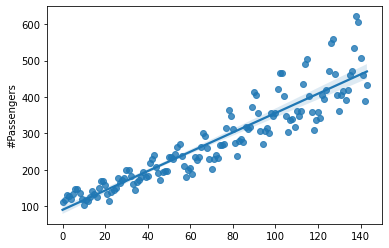

In [41]:
sns.regplot(x= fd1.index.values, y=fd1["#Passengers"])

<AxesSubplot:ylabel='#Passengers'>

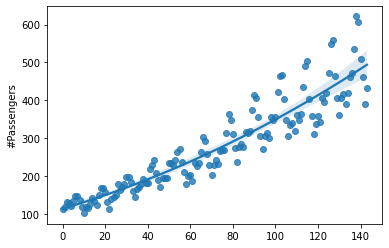

In [42]:
sns.regplot(x= fd1.index.values, y=fd1["#Passengers"], order =2)

In [43]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

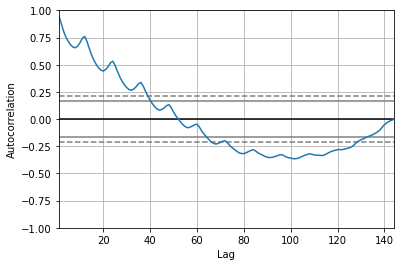

In [44]:
autocorrelation_plot(fd1["#Passengers"])